# FORD GoBike System Data Exploration


### About Ford GoBike

> Ford GoBike is the Bay Area's bike share system.Ford GoBike is operated by Motivate, the global leader in bike share. A full-service bike share operator and technology innovator, Motivate works to re-envision how people experience and move around cities. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose

> The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

In [2]:
#creating a dataframe
master_df = pd.DataFrame()

In [3]:
#assigning the data path to directory variable
directory = "C:\\Users\\srinivasan\\Desktop\\udacity\\data"

In [4]:
#Storing all data in a single dataframe
for file in os.listdir(directory):
    if file.endswith('.csv'):
        df = pd.read_csv(directory+'\\'+file)
        #print(df.shape)
        master_df = master_df.append(df,ignore_index=True)
        #print(master_df.shape)

In [5]:
#Checking whether any nyll values are present.
master_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [6]:
# Checking for duplicate values
master_df.duplicated().sum()

0

In [7]:
#Dropping  null values
master_df.dropna(inplace=True)

In [8]:
#Looking at no. of rows and columns
master_df.shape

(1741556, 16)

In [9]:
#Making a copy of original dataset
df_copy = master_df.copy()

In [10]:
#Since the data contains about 2 million rows, selecting a sample of 1million rows from it.
master_df = master_df.sample(1000000);

In [11]:
#Checking no.  of rows and columns
master_df.shape

(1000000, 16)

In [12]:
#Visualizing the data
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1328629,476,2018-09-12 17:09:03.9670,2018-09-12 17:17:00.3410,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3676,Subscriber,1981.0,Male,No
1607885,593,2018-11-29 08:13:58.1730,2018-11-29 08:23:52.1460,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,66.0,3rd St at Townsend St,37.778742,-122.392741,2319,Subscriber,1978.0,Male,No
524050,431,2018-05-17 17:26:34.1380,2018-05-17 17:33:45.6260,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,98.0,Valencia St at 16th St,37.765052,-122.421866,3771,Subscriber,1965.0,Male,Yes
444580,1171,2018-05-31 20:27:50.8680,2018-05-31 20:47:22.0280,160.0,West Oakland BART Station,37.805318,-122.294837,157.0,65th St at Hollis St,37.846784,-122.291376,3314,Subscriber,1993.0,Male,No
1245181,384,2018-09-25 16:58:44.6420,2018-09-25 17:05:09.6210,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,129.0,Harrison St at 20th St,37.758862,-122.412544,358,Subscriber,1973.0,Male,No


The start_time and end_time variables store start date and time which could be split up and stored in diff variables for visualization.Also need to modify data types of some of the variables

In [13]:
#Converting datatype pf start_time to datetime
master_df['start_time'] = pd.to_datetime(master_df['start_time'])

In [14]:
#Converting the datatype of end_time to datetime
master_df['end_time'] = pd.to_datetime(master_df['end_time'])

In [15]:
#Converting the datatype of station id to string
master_df['start_station_id'] = master_df['start_station_id'].astype(str)

In [16]:
#Converting the datatype of station id to string
master_df['end_station_id'] = master_df['end_station_id'].astype(str)

In [17]:
#Converting the datatype of bike id to string
master_df['bike_id'] = master_df['bike_id'].astype(str)

In [18]:
#Extracting travel day from start_time variable
master_df['travel_day'] = master_df.start_time.dt.strftime('%A') 

In [19]:
#Extracting travelmonth from start_time variable
master_df['travel_month'] = master_df.start_time.dt.strftime('%B') 

In [20]:
#Extracting travelyear from start_time variable
master_df['travel_year'] =  master_df.start_time.dt.strftime('%Y')

In [21]:
master_df['travel_year'] = master_df['travel_year'].astype('int64')
master_df['age'] = 2018 - master_df['member_birth_year']

In [22]:
#Extracting travelhour from start_time variable
master_df['travel_hour'] = master_df.start_time.dt.strftime('%H')

In [23]:
#Creating a new variable called duration_min
master_df['duration_min'] = master_df['duration_sec']/60

In [24]:
#Changing travel_day and travel_month as category datatype variable

month_order =['January','February','March','April','May','June','July','August','September','October','November','December']
day_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
master_df['travel_day'] = master_df['travel_day'].astype('category',ordered=True,categories=day_order)
master_df['travel_month'] = master_df['travel_month'].astype('category',ordered=True,categories=month_order)

C:\Users\srinivasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
C:\Users\srinivasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [25]:
#Changing daattype of member_gender
gender_order = ['Male','Female','Other']
master_df['member_gender'] = master_df['member_gender'].astype('category',ordered=True,categories=gender_order);

C:\Users\srinivasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#Checking datatypes of data
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1328629 to 898165
Data columns (total 22 columns):
duration_sec               1000000 non-null int64
start_time                 1000000 non-null datetime64[ns]
end_time                   1000000 non-null datetime64[ns]
start_station_id           1000000 non-null object
start_station_name         1000000 non-null object
start_station_latitude     1000000 non-null float64
start_station_longitude    1000000 non-null float64
end_station_id             1000000 non-null object
end_station_name           1000000 non-null object
end_station_latitude       1000000 non-null float64
end_station_longitude      1000000 non-null float64
bike_id                    1000000 non-null object
user_type                  1000000 non-null object
member_birth_year          1000000 non-null float64
member_gender              1000000 non-null category
bike_share_for_all_trip    1000000 non-null object
travel_day                 1000000 non-null 



### What is/are the main feature(s) of interest in your dataset?

> There are few main features to explore like duration_min, start time/day/week etc..

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We shall be focusing on duration_min,user_type,member_gender and few other variables

## Univariate Exploration


In [27]:
#Exploring duration_min variable
master_df.duration_min.describe()

count    1000000.000000
mean          12.878449
std           32.464742
min            1.016667
25%            5.733333
50%            9.050000
75%           13.983333
max         1436.800000
Name: duration_min, dtype: float64

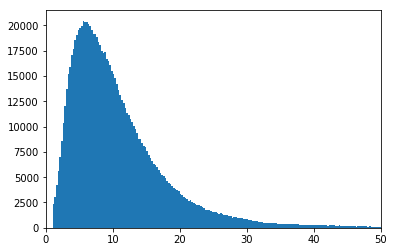

In [28]:
# Plotting a histogram graph using duration_min
bins=np.arange(1,master_df['duration_min'].max()+0.25,0.25);
plt.hist(data=master_df,x='duration_min',bins=bins);
plt.xlim(0,50);

**It look like a long tail. Let try to perform log transformation on the x-axis to look deeper**

C:\Users\srinivasan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


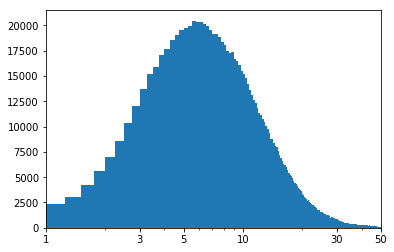

In [29]:
#Plotting duration_min variable
bins=np.arange(1,master_df['duration_min'].max()+0.25,0.25);
plt.hist(data=master_df,x='duration_min',bins=bins);
plt.xscale('log');
plt.xticks([1,3,5,10,30,50],[1,3,5,10,30,50]);
plt.xlim(0,50);

**Looking at the histogram , we could see that there is a peak at values between 5-10 mins, which suggests that max. of travel time is between 5 to 10 mins**

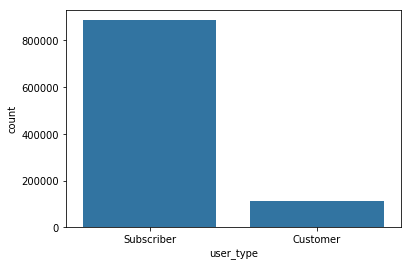

In [30]:
#Plotting user_type variable
color= sb.color_palette()[0]
sb.countplot(data=master_df,x='user_type',color=color);

**Looking at the above plot, the count of subscribers is much more than the count of customers**

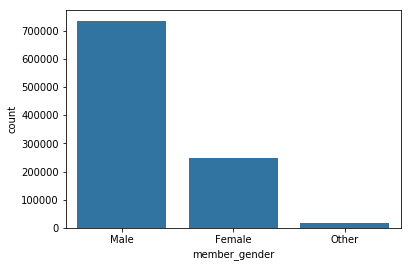

In [31]:
#Plotting member_gender variable
color= sb.color_palette()[0]
sb.countplot(data=master_df,x='member_gender',color=color);

**The above plot suggests that there are more male users when compared to female users**

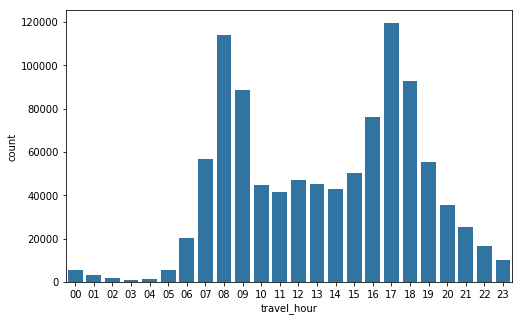

In [32]:
#Plotting travel_hour variable
plt.figure(figsize=[8,5]);
color = sb.color_palette()[0]
sb.countplot(data=master_df,x ='travel_hour',color= color);

**The graph suggests that the peak hourof usage is between 8-9 hrs and 17-18 hrs**

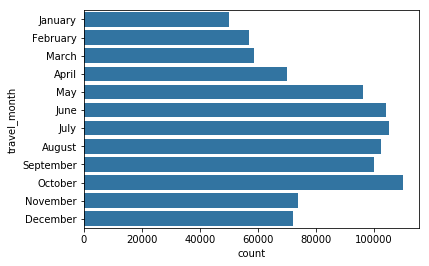

In [33]:
#PLotting travel month
color = sb.color_palette()[0]
sb.countplot(data=master_df,y ='travel_month',color= color);

**Looking at the plot, the no. of users between the month July-December is more when compared to users between the month January-June**

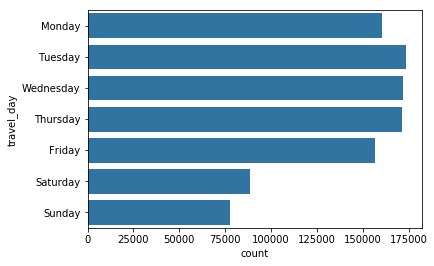

In [34]:
#plotting the travel_day variable
color = sb.color_palette()[0]
sb.countplot(data= master_df,y='travel_day',color=color);

**The plot suggests that more users are expected to use the bike more on weekdays while comparing with weekends(Saturday and Sunday)**

In [35]:
#Analyzing age variable
master_df['age'].describe()

count    1000000.000000
mean          34.953415
std           10.455233
min           18.000000
25%           28.000000
50%           33.000000
75%           40.000000
max          137.000000
Name: age, dtype: float64

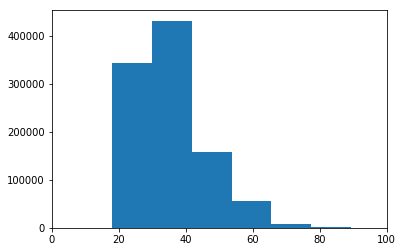

In [36]:
#Plotting age variable
plt.hist(data=master_df,x='age');
plt.xlim(0,100);

**The plot suggests that more no.of users are between the age category of 20-40**

### Conclusion on Univariate Exploration of data

> After visualizing the variables , below are the findings
   - Travel time of most no. of people are around 5-10 mins(Graph has a peak around 5-10 mins)
   - People are expected to use the bike service more on Weekdays when compared to weekends.
   - More users are using the bike service between months July-December when comparing with January-June
   - Age of most of the users are around 20-40 years.
   - The peaks hours of usage of this bike service are between 8-9 hrs and 17-18 hrs
   - The count of subscribers are more when comparing with customers
   - More no. of male users are using this bike service comparing to other genders

## Bivariate Exploration

> We shall look at the relationships between the above discussed variables

C:\Users\srinivasan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


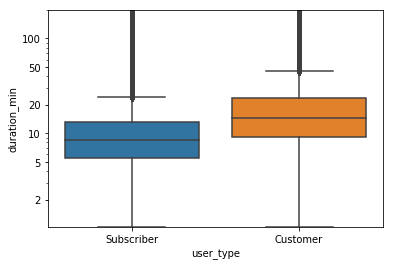

In [37]:
#Looking at the relationship between user_type and duration_min
sb.boxplot(data=master_df,x='user_type',y='duration_min');
plt.yscale('log');
plt.yticks([0,1,2,5,10,20,50,100],[0,1,2,5,10,20,50,100]);
plt.ylim(0,200);

**The box plot explores a strange relationship between duration_min and user_type.The plot suggests that average duration time of travel for customers are greater than subscribers**

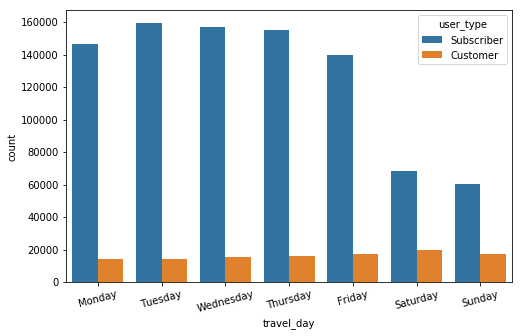

In [38]:
#Exploring relationship between travel_day and user_type
plt.figure(figsize=[8,5]);
sb.countplot(data=master_df,x='travel_day',hue='user_type');
plt.xticks(rotation=15);

**When exploring the travel_day variable, subscribers seems to use the service more on weekdays than weekends, but the Customers seems to use the service in equal basis on all days**

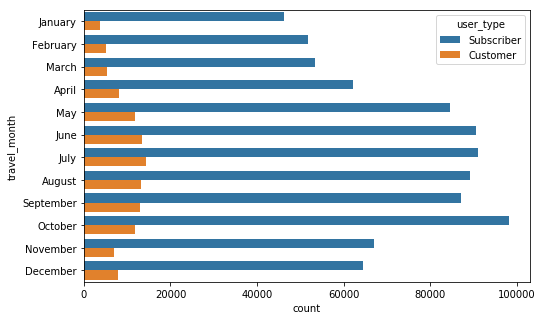

In [39]:
#Plotting travel_month vs user_type
plt.figure(figsize=[8,5]);
sb.countplot(data=master_df,y='travel_month',hue='user_type');

**Either subscribers or customers, no. of users are high between July-December when comapred with January-June.The peak usage is between month June to October independent of user_type**

<Figure size 576x360 with 0 Axes>

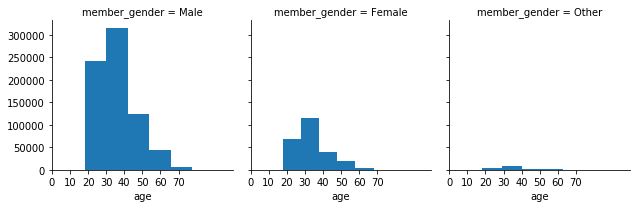

In [40]:
#Plotting age vs Member_gender
plt.figure(figsize=[8,5])
g=sb.FacetGrid(data=master_df,col='member_gender')
g.map(plt.hist,'age');
plt.xticks([0,10,20,30,40,50,60,70],[0,10,20,30,40,50,60,70]);
plt.xlim(0,100);

**Independent of user's gender, most users are around 20-40 years of age**

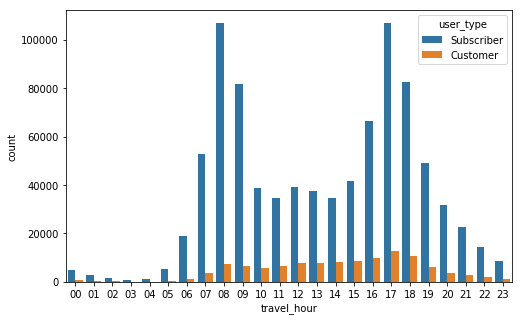

In [41]:
#Plotting travel_hour vs user_type
plt.figure(figsize=[8,5]);
sb.countplot(data=master_df,x='travel_hour',hue='user_type');

**Looking at the above plot, the peak hrs for subscribers are between 8-9 hrs and 17-18 hrs, whereas for customers, there is nothing such as peak hours since the usage count is same around 8-18 hrs with a minimal difference between them**

### Conclusion on Bivariate Exploration

> On exploring the relationship between diff. variables, PFB the findings
   - Average travel time of customers are greater than subscribers.
   - Subscribers tend to use the service more on weekdays than weekends, but its not the same trend with Customers
   - Independent of user types, the usage of service is more on July- December period than January - June
   - Most of the users of this bike service age of 20-40 irespective of gender
   - Peak hours for subscribers are around 8-9 hrs and 17-18 hrs, but its again not the same with customers as there is no big difference between different hours of usage

## Multivariate Exploration

> Now lets try to look at relationship between multiple variables

C:\Users\srinivasan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


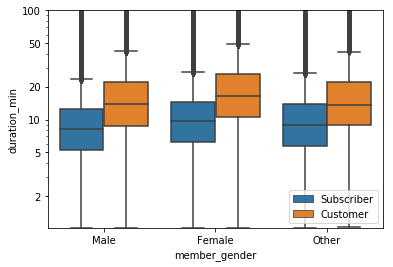

In [42]:
# Plotting duration_min, member_gender and user_type variables
sb.boxplot(data=master_df,y='duration_min',x='member_gender',hue='user_type');
plt.yscale('log');
plt.yticks([0,1,2,5,10,20,50,100],[0,1,2,5,10,20,50,100]);
plt.ylim(0,100);
plt.legend(loc=4);

**This plot further confimrs the fact that the average travel time of customers is greater than the subscribers irrespective of gender type too.**

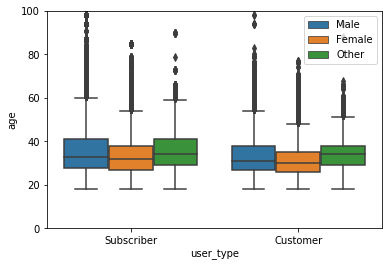

In [43]:
#Plotting age, member_gender,user_type
sb.boxplot(data=master_df,x='user_type',y='age',hue='member_gender');
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100]);
plt.ylim(0,100);
plt.legend(loc=1);

**This plot confirms that almost all users are between the age range of 20-40 irrespective of gender and user type(neglecting outliers)**

C:\Users\srinivasan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\srinivasan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x360 with 0 Axes>

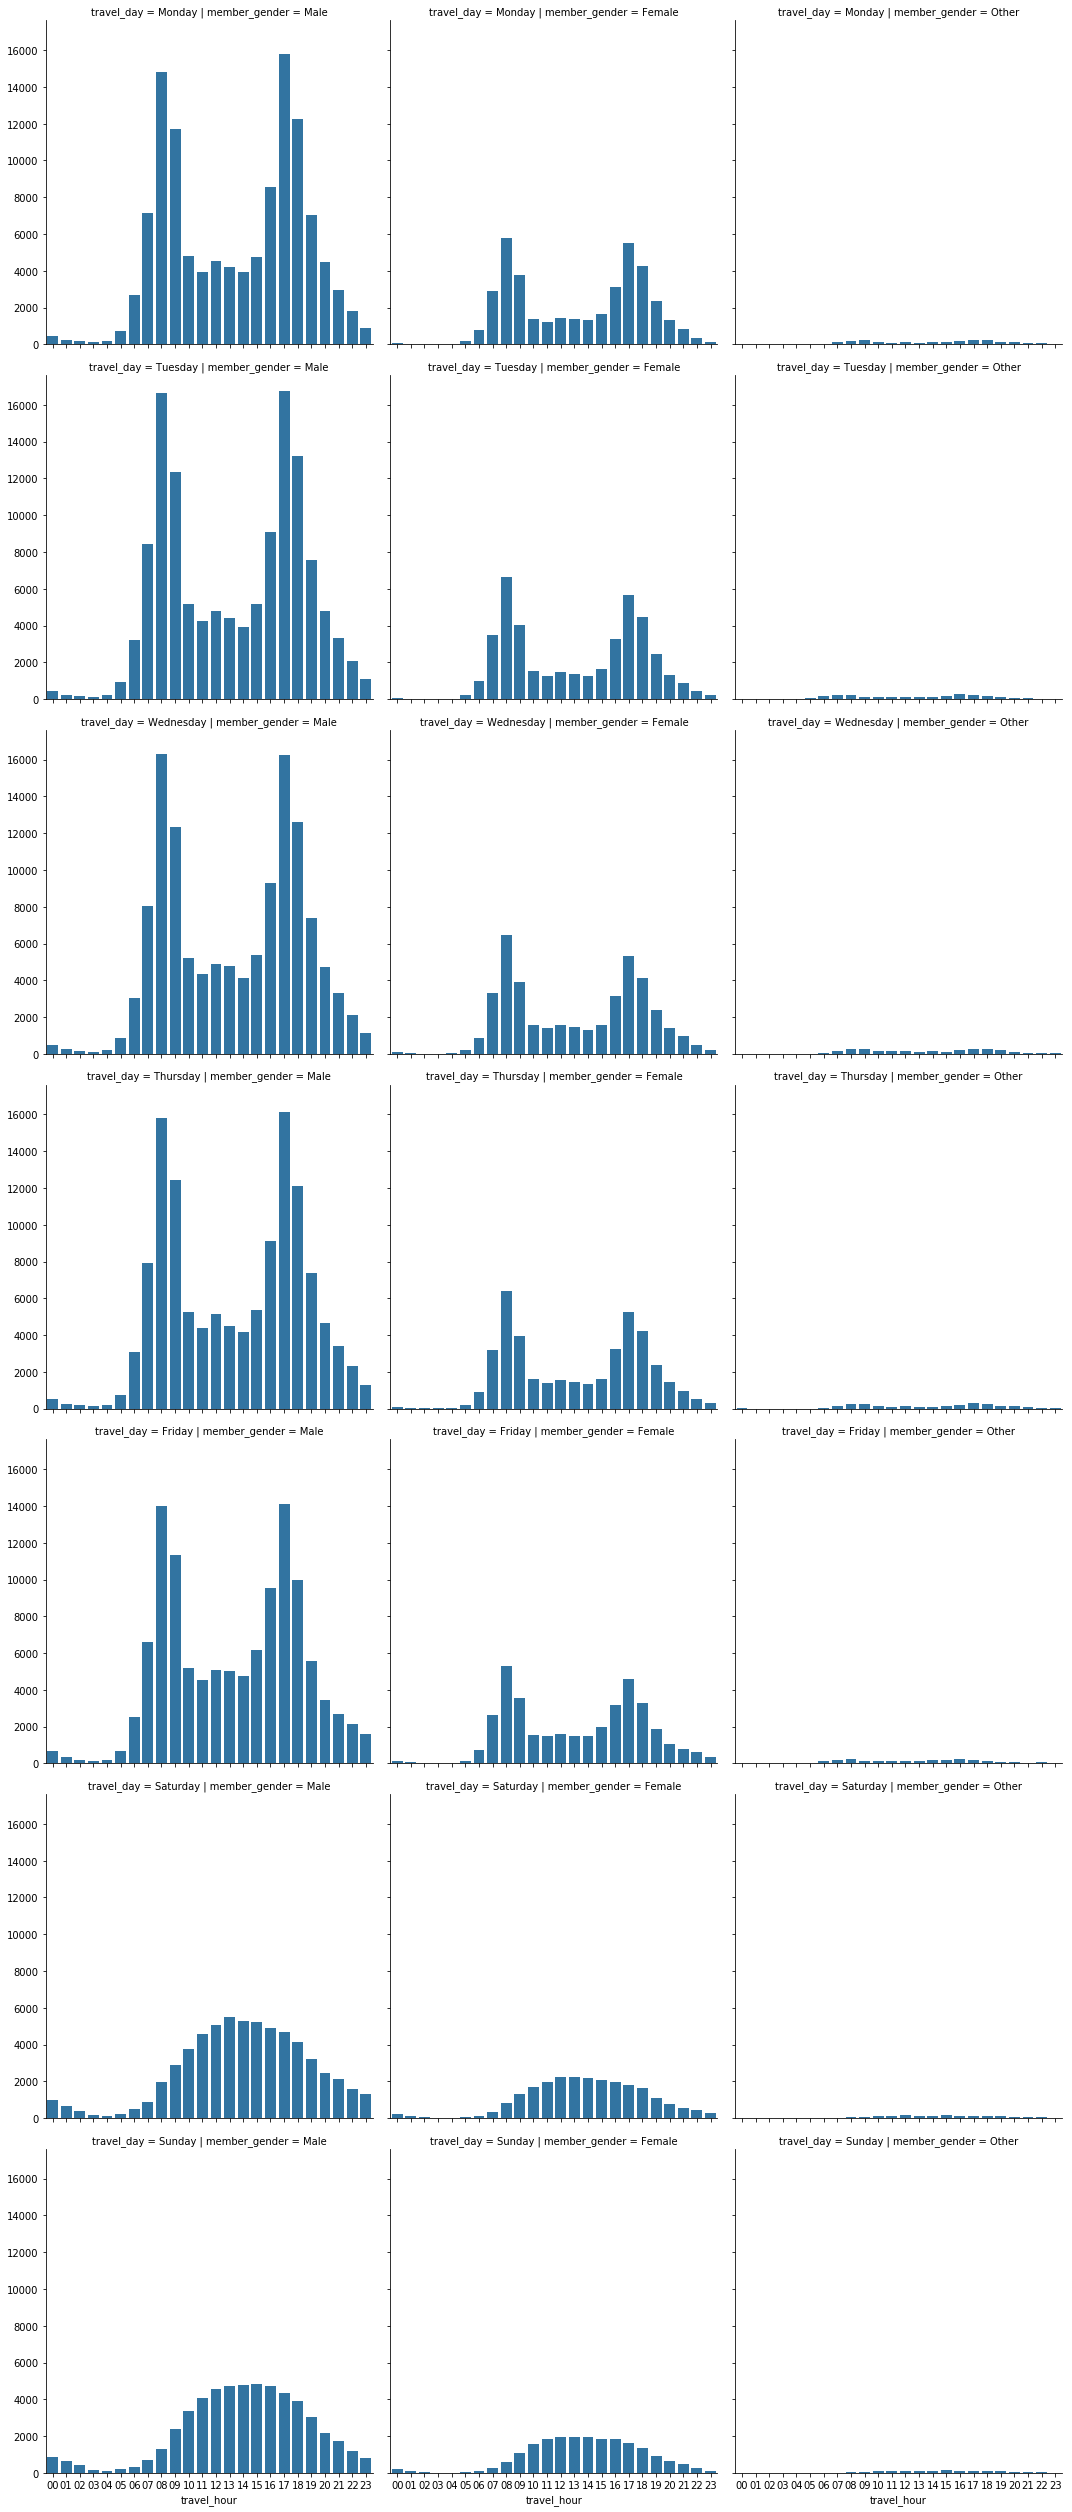

In [44]:
#plotting member_gender,travel_day and travel_hour
plt.figure(figsize=[15,5]);
g=sb.FacetGrid(data=master_df,col='member_gender',row='travel_day',size=5)
g.map(sb.countplot,'travel_hour');

**This above plot leads to a very interesting finding.We already said that the peak hours are between 8-9 hrs and 17-18 hrs.This statement holds true for all weeekdays but not on weekends. On Saturday and Sunday , the peak hour timing changes as its between 11-18 hrs approximately**

C:\Users\srinivasan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\srinivasan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


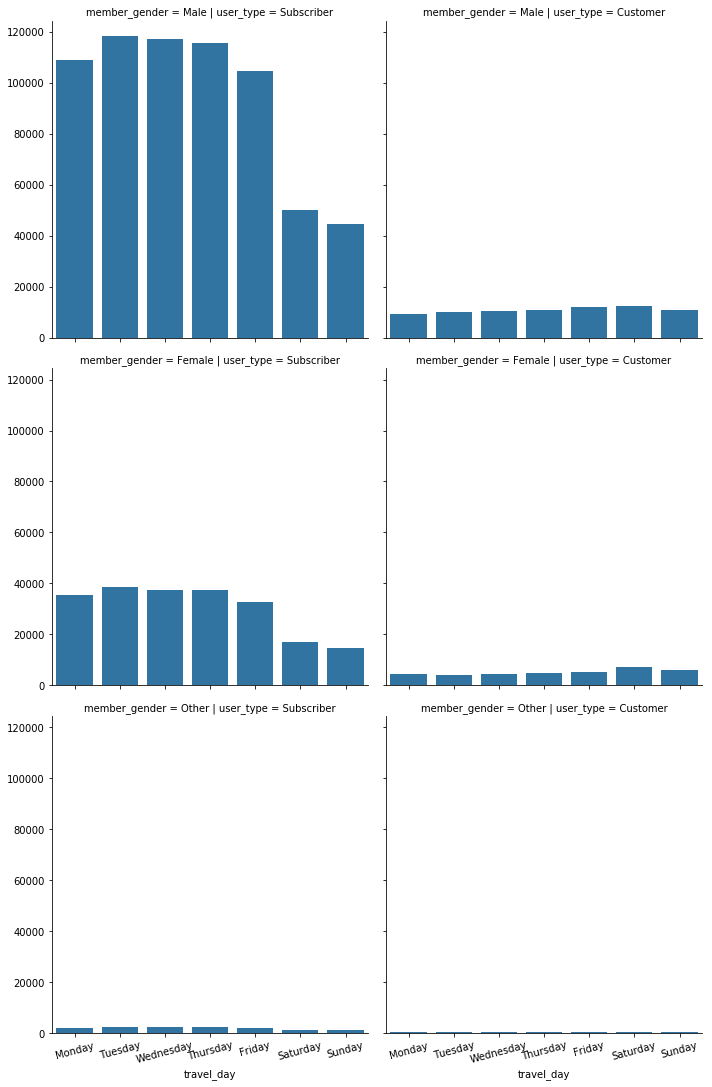

In [45]:
#Plotting user_type,member_gender and travel_day
g=sb.FacetGrid(data=master_df,col='user_type',row='member_gender',size =5)
g.map(sb.countplot,'travel_day');
g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=15)

**This plot strengthens our earlier finding i.e. subscribers are using the service more on weekdays than weekends irrespective of their gender type and customers use this service with no big difference between the days.**

### Conclusion of Multivariate Exploration

> On comparing multiple variables, below are the highlights
 - Average travel time of customers is greater than the subscribers irrespective of gender type
 - Most of the users fall between the age range of 20-40 considering all user types and gender
 - Peak hours of 8-9 hrs and 17-18 hrs for subscribers are true on weekdays but not on weekends
 - Subscribers use the service more on weekdays than weekends.

In [46]:
master_df.to_csv('master_data.csv',index=False)